In [7]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys

from run_utils import run_env_experiment, plot_ratings_mses

sys.path.append('../') 
from reclab.environments.latent_factors import DatasetLatentFactor, LatentFactorBehavior

from reclab.recommenders import LibFM
from reclab.recommenders import KNNRecommender
from reclab.recommenders import TopPop



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exploration with Different User Behaviors

In this notebook, for a fixed level of model and user behavior complexity, we illustrate how epsilon-greedy exploration strategies compare for static and dynamin user models.

In [14]:
## Key Parameters across all settings
expdirname = 'exploration'
bucket_name = None
data_dir = None


num_users = 500
num_items = 170 * 2

env_params = {
    'num_users': num_users,
    'num_items': num_items,
    'rating_frequency': 0.5,
    'num_init_ratings': 500
}

exp_params = {
    'len_trial': 10,
    'trial_seeds': np.arange(1),
}


In [15]:

recommenders = [
    LibFM(
        num_user_features=0,
        num_item_features=0,
        num_rating_features=0,
        max_num_users=num_users,
        max_num_items=num_items,
        method='sgd',
        learning_rate=0.01,
        strategy='greedy'
    ),
    LibFM(
        num_user_features=0,
        num_item_features=0,
        num_rating_features=0,
        max_num_users=num_users,
        max_num_items=num_items,
        method='sgd',
        learning_rate=0.01,
        strategy='eps_greedy'
    ),
    KNNRecommender(
        user_based=False,
        strategy='greedy'
    ),
    KNNRecommender(
        user_based=False,
        strategy='eps_greedy'
    ),
] 

recommender_names = ['libfm greedy', 'libfm eps', 'knn item greedy', 'knn item eps']


## Static User Behavior

Here, the user model does not change over time. 

In [16]:
params = {'latent_dim': 8}
env_params_dataset = {key:env_params[key] for key in env_params.keys() if key not in ['num_users', 'num_items']}
for key in ['num_users', 'num_items']:
    env_params_dataset['max_'+key] = env_params[key]
env = DatasetLatentFactor('ml-100k', **params, **env_params_dataset)

ratings, preds, dense_ratings, dense_preds = run_env_experiment(environments=[env],
                                                                recommenders=recommenders,
                                                                **exp_params,
                                                                bucket_name=bucket_name,
                                                                data_dir=data_dir,
                                                                overwrite=False)


Started experiments on environment: latent-ml-100k_0
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 943, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0, "kwargs": {}}.
	Initial density: 0.29411764705882354%, Final density: 1.7647058823529411%, Good item density: 6.022941176470589%
Running trials for recommender: libfm_0
Running trial with seed: 0
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 943, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "t


Running trials for recommender: libfm_1
Running trial with seed: 0
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 943, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0, "kwargs": {}}.



Running trials for recommender: knn_0
Running trial with seed: 0
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 943, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0, "kwargs": {}}.



Running trials for recommender: knn_1
Running trial with seed: 0
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 943, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0, "kwargs": {}}.


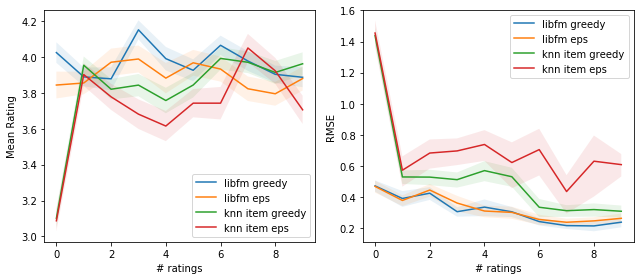

In [17]:
plot_ratings_mses(ratings[0], preds[0], recommender_names)

In [18]:
params = {'latent_dim': 8}

env = LatentFactorBehavior(**params, **env_params)

ratings, preds, dense_ratings, dense_preds = run_env_experiment(environments=[env],
                                                                recommenders=recommenders,
                                                                **exp_params,
                                                                bucket_name=bucket_name,
                                                                data_dir=data_dir,
                                                                overwrite=False)

Started experiments on environment: latent_0
	Initial density: 0.29411764705882354%, Final density: 1.7647058823529411%, Good item density: 15.083529411764706%
Running trials for recommender: libfm_0
Running trial with seed: 0



Running trials for recommender: libfm_1
Running trial with seed: 0



Running trials for recommender: knn_0
Running trial with seed: 0



Running trials for recommender: knn_1
Running trial with seed: 0


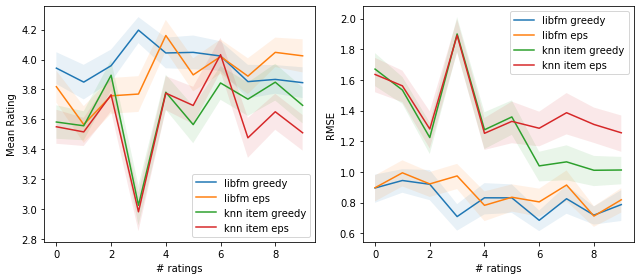

In [19]:
plot_ratings_mses(ratings[0], preds[0], recommender_names)